# Tutorial 9  - Support Vector Machine 
Support vector machine (SVM) is a supervised machine learning algorithm for classification and regression problems. 

SVM is a discriminative classification model because it learns explicit boundaries between classes. 


In two dimensions, SVM tries to find a line that divides the classes from each other. 

Lets see an example with 2 classes of normal distrbution points:

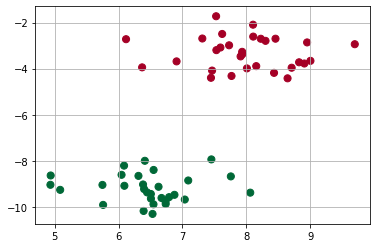

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
import numpy as np 
#import seaborn as sns; sns.set()
%matplotlib inline

X, y = make_blobs(n_samples=60, centers=2, random_state=6 , cluster_std=0.7)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlGn')
plt.grid()


We want to find a line that separate between the green class and the red class.


let's see a few posible lines options: 

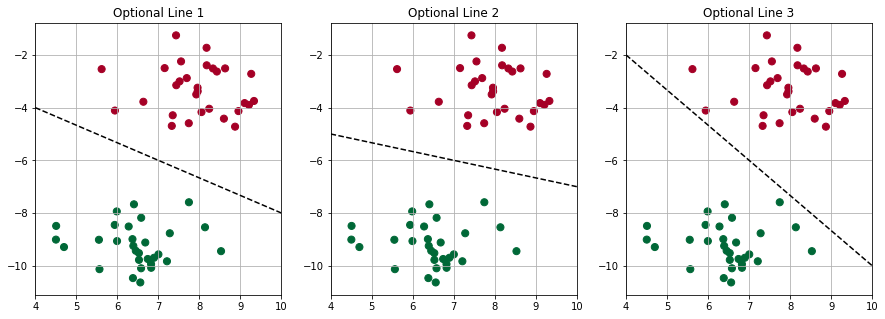

In [23]:
X, y = make_blobs(n_samples=60, centers=2, random_state=6 , cluster_std=0.9)
fig, ax = plt.subplots(1,3, figsize = (15,5))

x_point = [4, 10]
for  i , y_points in enumerate([[-4, -8] ,[-5, - 7], [-2, -10] ]): 
  ax[i].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlGn')
  ax[i].plot(x_point, y_points, 'k--') 
  ax[i].grid()
  ax[i].set_xlim(x_point)
  ax[i].set_title(f'Optional Line {i+1}')


How we will choose which line is the best? 


# SVM solution: USE THE MARGIN

SVM is a maximal margin classifier, meaning that it learns a decision boundary that maximizes the distance between samples of the two classes. 

Let's calculate the margin on the optional line:

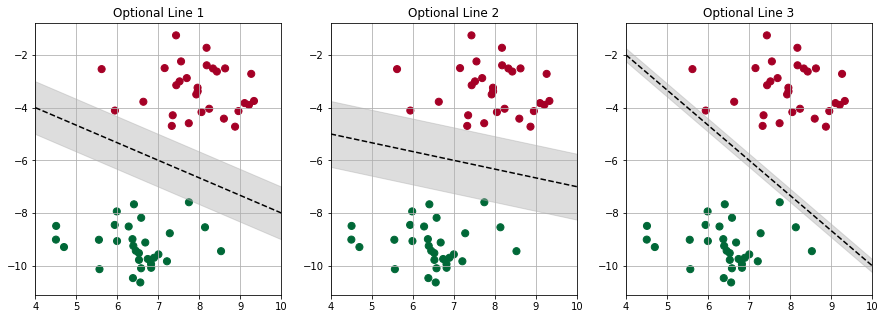

In [51]:
xfit = np.linspace(4, 10)
fig, ax = plt.subplots(1,3, figsize = (15,5))

for  i , (y_points ,d) in enumerate(zip([(-4, -8) ,(-5, - 7) , (-2, -10 ) ] , [1, 1.25 ,0.25])): 

  coefficients = np.polyfit(x_point, y_points, 1)
  polynomial = np.poly1d(coefficients)
  y_axis = polynomial(xfit)
  ax[i].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdYlGn')
  ax[i].plot(xfit, y_axis, 'k--') 
  ax[i].fill_between(xfit ,y_axis + d ,y_axis - d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4 )
  ax[i].grid()
  ax[i].set_xlim(x_point)
  ax[i].set_title(f'Optional Line {i+1}')


In [30]:
y_axis.shape

(50,)